In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [50]:
brasileiro = pd.read_csv("campeonato-brasileiro-full.csv")

In [51]:
brasileiro.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [52]:
brasileiro.tail()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
7934,17:00,Domingo,2019-12-08,Goiás,Grêmio,Goiás,38ª Rodada,Serra Dourada,3,2,GO,RS,GO
7935,17:00,Domingo,2019-12-08,Internacional,Atlético-MG,Internacional,38ª Rodada,Beira Rio,2,1,RS,MG,RS
7936,17:00,Domingo,2019-12-08,Cruzeiro,Palmeiras,Palmeiras,38ª Rodada,Mineirão,0,2,MG,SP,SP
7937,17:00,Domingo,2019-12-08,Santos,Flamengo,Santos,38ª Rodada,Vila Belmiro,4,0,SP,RJ,SP
7938,17:00,Domingo,2019-12-08,CSA,São Paulo,São Paulo,38ª Rodada,Rei Pelé,1,2,AL,SP,SP


In [53]:
brasileiro.shape

(7939, 13)

In [54]:
brasileiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


# Período de jogos deste dataset

In [55]:
brasileiro['Data'] = pd.to_datetime(brasileiro['Data'])

In [56]:
print("O primeiro jogo desse dataset foi:", brasileiro['Data'].min())
print("O ùltimo jogo desse dataset foi:", brasileiro['Data'].max())

O primeiro jogo desse dataset foi: 2000-07-29 00:00:00
O ùltimo jogo desse dataset foi: 2019-12-08 00:00:00


Esse Dataset contém os jogos do ano 2000 até 2019. São 19 anos de história de Campeonato Brasileiro.

In [57]:
brasileiro.describe()

,Clube 1 Gols,Clube 2 Gols
count,7939.000000,7939.000000
mean,1.596801,1.052526
std,1.251372,1.039719
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


In [58]:
#Removendo os empates do dataset
filtro = brasileiro['Vencedor'] != "-"
bras_sem_empates = brasileiro[filtro]

# Clubes com mais vitórias

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 <a list of 57 Text xticklabel objects>)

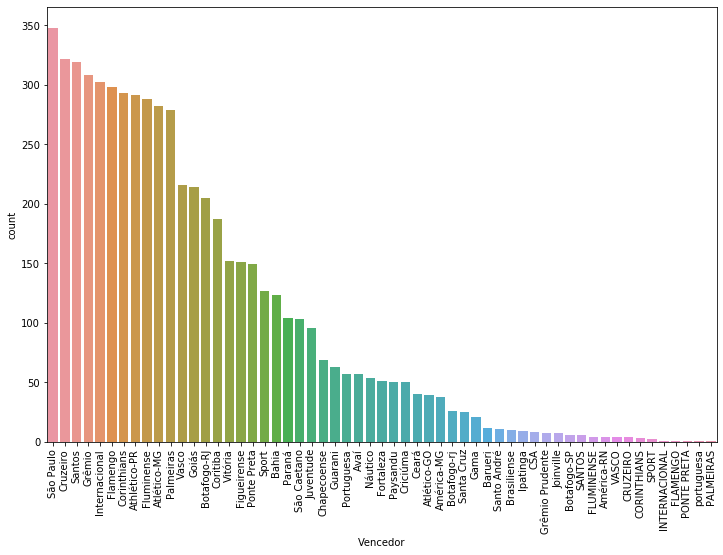

In [59]:
# plot dos maiores vencedores (sem tratamento)
plt.figure(figsize=(12,8))
sns.countplot(x = "Vencedor", data = bras_sem_empates, order = bras_sem_empates['Vencedor'].value_counts().index)
plt.xticks(rotation=90)

Existem times repetidos pois estão com letras maiusculas. Primeiro vou tratar isso.


In [60]:
# Tratamento de clubes repetidos
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("FLAMENGO","Flamengo")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("FLUMINENSE","Fluminense")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("CRUZEIRO","Cruzeiro")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("SANTOS","Santos")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("VASCO","Vasco")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("PALMEIRAS","Palmeiras")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("CORINTHIANS","Corinthians")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("INTERNACIONAL","Internacional")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("PONTE PRETA","Ponte Preta")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("portuguesa","Portuguesa")
bras_sem_empates['Vencedor'] = bras_sem_empates['Vencedor'].replace("SPORT","Sport")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

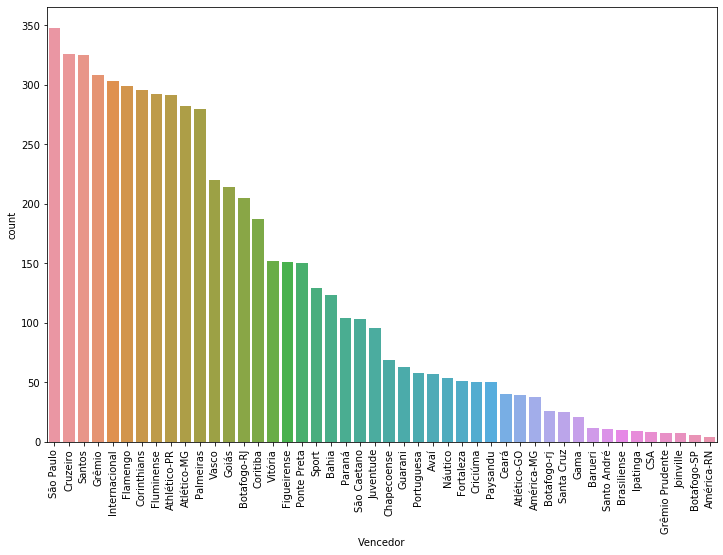

In [61]:
# plot dos maiores vencedores (com tratamento)
plt.figure(figsize=(12,8))
sns.countplot(x = "Vencedor", data = bras_sem_empates, order = bras_sem_empates['Vencedor'].value_counts().index)
plt.xticks(rotation=90)

O clube com mais vitórias no Brasileirão é o São Paulo.

# Estado com maiores vencedores de jogos

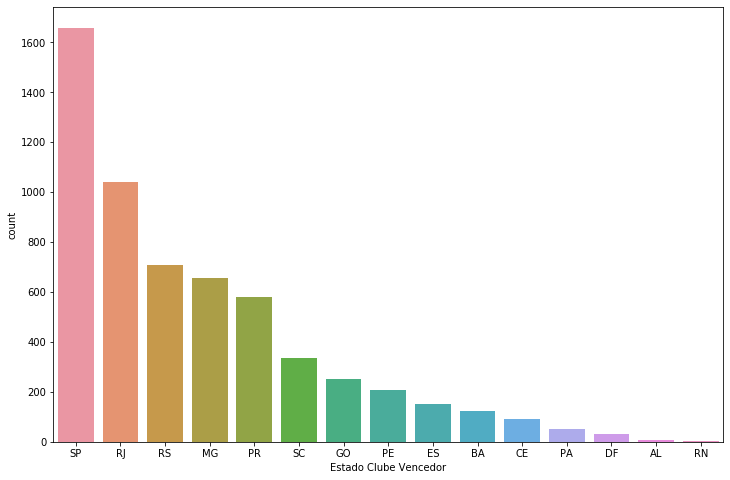

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Estado Clube Vencedor", data = bras_sem_empates, order = bras_sem_empates['Estado Clube Vencedor'].value_counts().index)

Os clubes do Estado de São Paulo são os clubes que mais venceram.

# Estádio com mais jogos no Brasileirão

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text xticklabel objects>)

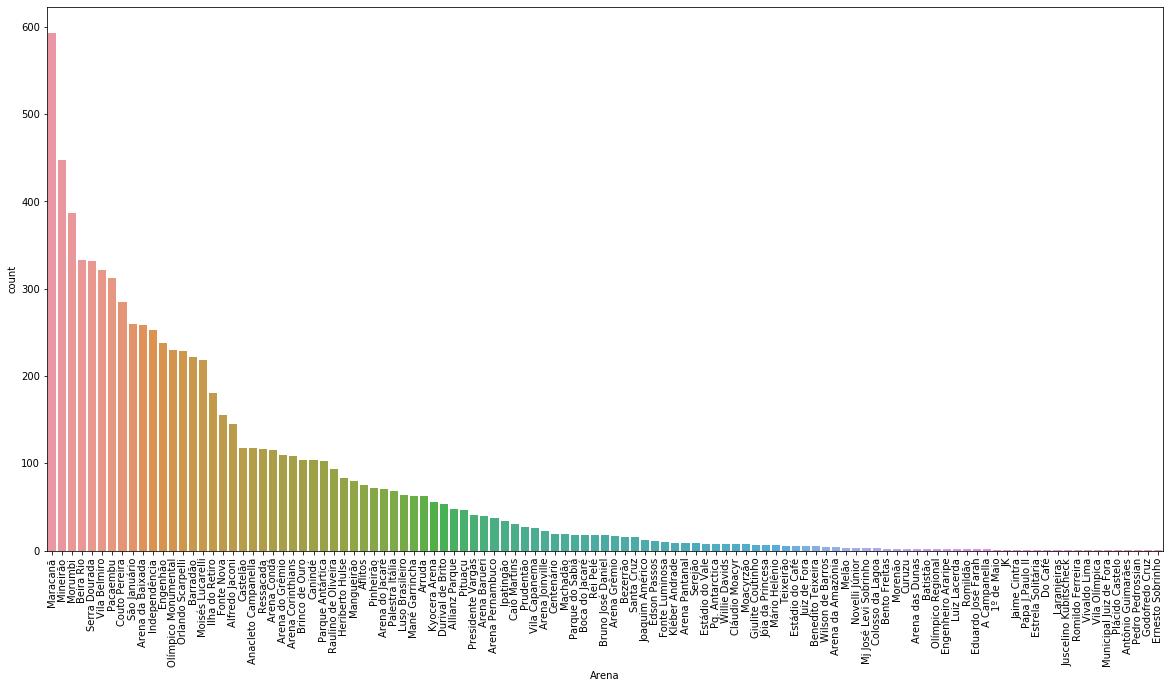

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Arena", data = brasileiro, order = brasileiro['Arena'].value_counts().index)
plt.xticks(rotation=90)

O Estádio do Maracaná é o Estádio que mais recebeu jogos no campeonato Brasileiro.